# Import Library

In [1]:
import numpy as np 
import pandas as pd 

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

#!pip install jcopml # Baris ini dijalankan apabila belum memiliki library jcopml
from jcopml.pipeline import num_pipe, cat_pipe
from jcopml.plot import plot_missing_value

# Load Data

In [2]:
df = pd.read_csv("data.csv")

# Menampilkan 5 baris pertama pada data

In [3]:
df.head()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,NaN,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,3.716080,129.422921,18630.057858,6.635246,NaN,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.541732,9.275884,NaN,418.606213,16.868637,66.420093,3.055934,0
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0


# Mengidentifikasi Missing Value

In [4]:
df.isna().sum()

ph                 491
Hardness             0
Solids               0
Chloramines          0
Sulfate            781
Conductivity         0
Organic_carbon       0
Trihalomethanes    162
Turbidity            0
Potability           0
dtype: int64

# Impute Missing Value

In [5]:
ph0 = df[df['Potability'] == 0]['ph'].mean()
ph1 = df[df['Potability'] == 1]['ph'].mean()

sulfate0 = df[df['Potability'] == 0]['Sulfate'].mean()
sulfate1 = df[df['Potability'] == 1]['Sulfate'].mean()

Trihalomethanes0 = df[df['Potability'] == 0]['Trihalomethanes'].mean()
Trihalomethanes1 = df[df['Potability'] == 1]['Trihalomethanes'].mean()

In [6]:
df.loc[(df['Potability'] == 0) & (df['ph'].isna()),'ph'] = ph0
df.loc[(df['Potability'] == 1) & (df['ph'].isna()),'ph'] = ph1

df.loc[(df['Potability'] == 0) & (df['Sulfate'].isna()),'Sulfate'] = sulfate0
df.loc[(df['Potability'] == 1) & (df['Sulfate'].isna()),'Sulfate'] = sulfate1

df.loc[(df['Potability'] == 0) & (df['Trihalomethanes'].isna()),'Trihalomethanes'] = Trihalomethanes0
df.loc[(df['Potability'] == 1) & (df['Trihalomethanes'].isna()),'Trihalomethanes'] = Trihalomethanes1

In [7]:
df.isna().sum()

ph                 0
Hardness           0
Solids             0
Chloramines        0
Sulfate            0
Conductivity       0
Organic_carbon     0
Trihalomethanes    0
Turbidity          0
Potability         0
dtype: int64

# Mengidentifikasi Korelasi Antar Kolom

In [8]:
df.corr()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
ph,1.000000,0.075878,-0.081887,-0.031827,0.014785,0.017205,0.040092,0.003009,-0.036211,-0.003848
Hardness,0.075878,1.000000,-0.046899,-0.030054,-0.092718,-0.023915,0.003610,-0.012718,-0.014449,-0.013837
Solids,-0.081887,-0.046899,1.000000,-0.070148,-0.149809,0.013831,0.010242,-0.008849,0.019546,0.033743
Chloramines,-0.031827,-0.030054,-0.070148,1.000000,0.023490,-0.020486,-0.012653,0.016615,0.002363,0.023779
Sulfate,0.014785,-0.092718,-0.149809,0.023490,1.000000,-0.014196,0.027403,-0.025797,-0.009523,-0.026957
Conductivity,0.017205,-0.023915,0.013831,-0.020486,-0.014196,1.000000,0.020966,0.001238,0.005798,-0.008128
Organic_carbon,0.040092,0.003610,0.010242,-0.012653,0.027403,0.020966,1.000000,-0.012944,-0.027308,-0.030001
Trihalomethanes,0.003009,-0.012718,-0.008849,0.016615,-0.025797,0.001238,-0.012944,1.000000,-0.021540,0.007305
Turbidity,-0.036211,-0.014449,0.019546,0.002363,-0.009523,0.005798,-0.027308,-0.021540,1.000000,0.001581
Potability,-0.003848,-0.013837,0.033743,0.023779,-0.026957,-0.008128,-0.030001,0.007305,0.001581,1.000000


<AxesSubplot:>

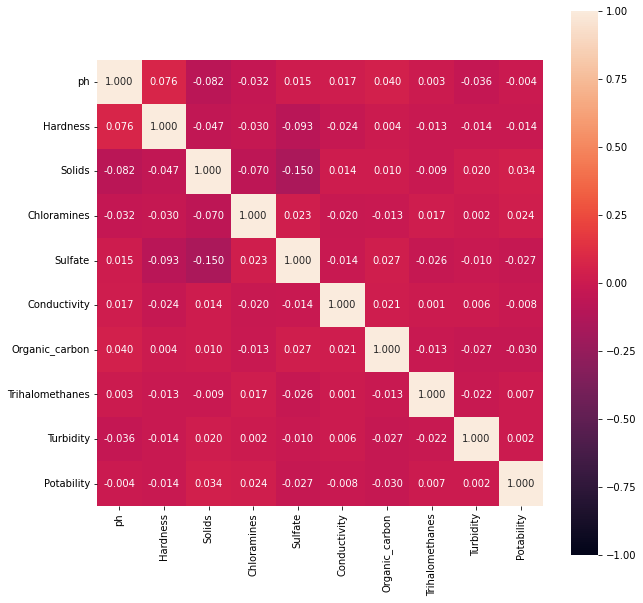

In [9]:
plt.figure(figsize=(10,10))
sns.heatmap(df.corr(), cbar=True, vmin=-1, vmax=1, annot=True, square=True, fmt=".3f")

# Mengidentifikasi Summary dari dataset

In [10]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
ph,3276.0,7.080855,1.469958,0.000000,6.277673,7.085378,7.870050,14.000000
Hardness,3276.0,196.369496,32.879761,47.432000,176.850538,196.967627,216.667456,323.124000
Solids,3276.0,22014.092526,8768.570828,320.942611,15666.690297,20927.833607,27332.762127,61227.196008
Chloramines,3276.0,7.122277,1.583085,0.352000,6.127421,7.130299,8.114887,13.127000
Sulfate,3276.0,333.785123,36.145701,129.000000,317.094638,334.564290,350.385756,481.030642
Conductivity,3276.0,426.205111,80.824064,181.483754,365.734414,421.884968,481.792304,753.342620
Organic_carbon,3276.0,14.284970,3.308162,2.200000,12.065801,14.218338,16.557652,28.300000
Trihalomethanes,3276.0,66.395671,15.769901,0.738000,56.647656,66.303555,76.666609,124.000000
Turbidity,3276.0,3.966786,0.780382,1.450000,3.439711,3.955028,4.500320,6.739000
Potability,3276.0,0.390110,0.487849,0.000000,0.000000,0.000000,1.000000,1.000000


# Memotong dataset menjadi data train dan data test

In [11]:
X = df.drop('Potability', axis = 1)
y = df['Potability']

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.8, shuffle = True, random_state = 1)
print(X.shape,X_train.shape, X_test.shape)

(3276, 9) (2620, 9) (656, 9)


# Pipeline

In [12]:
from sklearn.model_selection import GridSearchCV
from jcopml.tuning import grid_search_params as gsp

In [13]:
#Opsi parameter yang digunakan untuk Random Forest
gsp.rf_params

{'algo__n_estimators': [100, 150, 200],
 'algo__max_depth': [20, 50, 80],
 'algo__max_features': [0.3, 0.6, 0.8],
 'algo__min_samples_leaf': [1, 5, 10]}

# Algoritma Random Forest

In [14]:
# Preprocessing Data
preprocessor = ColumnTransformer([
    ('numeric', num_pipe(scaling='standard'), ['ph', 'Hardness', 'Solids', 'Chloramines', 'Sulfate', 'Conductivity',
       'Organic_carbon', 'Trihalomethanes', 'Turbidity'])
])

# Menyediakan Pipeline
pipeline = Pipeline([
    ('prep', preprocessor),
    ('algo', RandomForestClassifier(n_jobs=-1, random_state=42))
])


#Melatih Model
model_rf = GridSearchCV(pipeline, gsp.rf_params, cv=3, scoring='accuracy',  n_jobs=-1, verbose=1, return_train_score=True)
model_rf.fit(X_train, y_train)

print(model_rf.best_params_)
print(model_rf.score(X_train, y_train), model_rf.best_score_, model_rf.score(X_test, y_test))


Fitting 3 folds for each of 81 candidates, totalling 243 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  26 tasks      | elapsed:    3.9s
[Parallel(n_jobs=-1)]: Done 176 tasks      | elapsed:   18.6s
[Parallel(n_jobs=-1)]: Done 243 out of 243 | elapsed:   24.9s finished


{'algo__max_depth': 20, 'algo__max_features': 0.3, 'algo__min_samples_leaf': 5, 'algo__n_estimators': 100}
0.9496183206106871 0.7908441480712588 0.7911585365853658


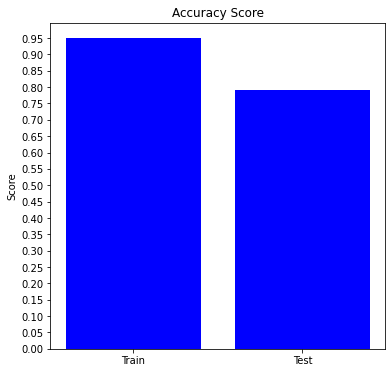

In [15]:
score_train = model_rf.score(X_train, y_train)
score_test = model_rf.score(X_test, y_test)

plt.figure(figsize=(6,6))
plt.bar((['Train', 'Test']), (score_train, score_test), color='b')
plt.yticks(np.arange(0,1,0.05))
plt.ylabel('Score');
plt.title('Accuracy Score')
plt.savefig('plot_acc_score.png', bbox_inches='tight')

In [16]:
def plot_search_results(grid):
    results = grid.cv_results_
    means_test = results['mean_test_score']
    stds_test = results['std_test_score']
    means_train = results['mean_train_score']
    stds_train = results['std_train_score']

    masks=[]
    masks_names= list(grid.best_params_.keys())
    for p_k, p_v in grid.best_params_.items():
        masks.append(list(results['param_'+p_k].data==p_v))

    params=grid.param_grid

    fig, ax = plt.subplots(1,len(params),sharex='none', sharey='all',figsize=(20,5))
    fig.suptitle('Score per parameter')
    fig.text(0.04, 0.5, 'MEAN SCORE', va='center', rotation='vertical')
    pram_preformace_in_best = {}
    for i, p in enumerate(masks_names):
        m = np.stack(masks[:i] + masks[i+1:])
        pram_preformace_in_best
        best_parms_mask = m.all(axis=0)
        best_index = np.where(best_parms_mask)[0]
        x = np.array(params[p])
        y_1 = np.array(means_test[best_index])
        e_1 = np.array(stds_test[best_index])
        y_2 = np.array(means_train[best_index])
        e_2 = np.array(stds_train[best_index])
        ax[i].errorbar(x, y_1, e_1, linestyle='--', marker='o', label='test')
        ax[i].errorbar(x, y_2, e_2, linestyle='-', marker='^',label='train' )
        ax[i].set_xlabel(p.upper())
    
    plt.legend()
    plt.savefig('plot.png', bbox_inches='tight')
    plt.show()

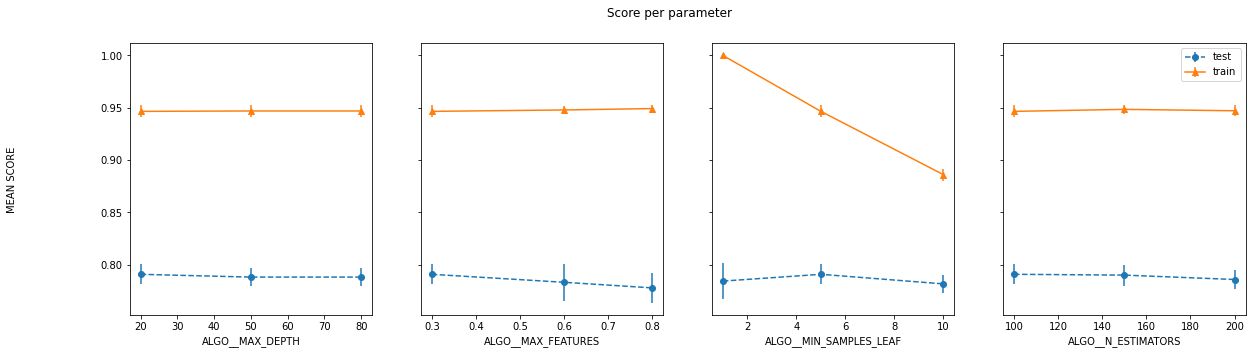

In [17]:
plot_search_results(model_rf)

# Menampilkan Confusion Matrix dari algoritma Random Forest

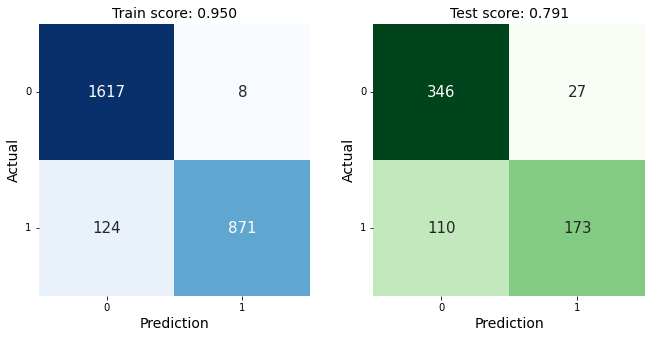

In [18]:
from jcopml.plot import plot_confusion_matrix
plot_confusion_matrix(X_train, y_train, X_test, y_test, model_rf)

# Menampilkan recall, pecision, dan f1-score algoritma Random Forest

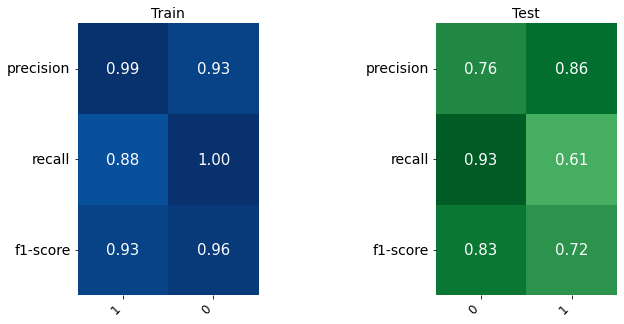

In [19]:
from jcopml.plot import plot_classification_report
plot_classification_report(X_train, y_train, X_test, y_test, model_rf)

In [20]:
print('Random Forest Accuracy Score = {:.2f}%'.format(model_rf.score(X_test, y_test)*100))

Random Forest Accuracy Score = 79.12%


# Prediksi

In [21]:
data = [[7, 120, 15000, 5, 200,300, 12, 40, 2 ],
        [6, 120, 15000, 5, 320,300, 12, 60, 2 ],
        [9, 200, 20000, 8, 330, 450, 15, 70, 3.7],
        [7, 120, 15000,5, 220,300, 12, 55, 2],
       ]
X_pred = pd.DataFrame(data, index=["Air A", "Air B", "Air C", "Air D"], columns=['ph', 'Hardness', 'Solids', 'Chloramines', 'Sulfate', 'Conductivity',
       'Organic_carbon', 'Trihalomethanes', 'Turbidity'])

In [22]:
X_pred["Kelayakan"] = list(model_rf.predict(X_pred))
X_pred['Kelayakan'] = X_pred.Kelayakan.map({0:'Tidak Dapat Diminum', 1:'Dapat Diminum'})

In [23]:
X_pred

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Kelayakan
Air A,7,120,15000,5,200,300,12,40,2.0,Dapat Diminum
Air B,6,120,15000,5,320,300,12,60,2.0,Tidak Dapat Diminum
Air C,9,200,20000,8,330,450,15,70,3.7,Tidak Dapat Diminum
Air D,7,120,15000,5,220,300,12,55,2.0,Dapat Diminum
